<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap08/8_4_High_Dimensional_Spaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 8.4: High-dimensional spaces**

This notebook investigates the strange properties of high-dimensional spaces as discussed in the notes at the end of chapter 8.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sci

# How close are points in high dimensions?

In this part of the notebook, we investigate how close random points are in 2D, 100D, and 1000D.   In each case, we generate 1000 points and calculate the Euclidean distance between each pair.  

In [2]:
# Fix the random seed so we all have the same random numbers
np.random.seed(0)
n_data = 1000
# Create 1000 data examples (columns) each with 2 dimensions (rows)
n_dim = 2
x_2D = np.random.normal(size=(n_dim,n_data))
# Create 1000 data examples (columns) each with 100 dimensions (rows)
n_dim = 100
x_100D = np.random.normal(size=(n_dim,n_data))
# Create 1000 data examples (columns) each with 1000 dimensions (rows)
n_dim = 1000
x_1000D = np.random.normal(size=(n_dim,n_data))

In [9]:
def distance_ratio(x):
  # Initialize smallest and largest distances with large and small values, respectively
    smallest_dist = np.inf
    largest_dist = -np.inf

    # Iterate through all pairs of data points
    for i in range(len(x)):
        for j in range(len(x)):
            if i != j:
                # Calculate Euclidean distance between data points i and j
                dist = np.linalg.norm(x[i] - x[j])

                # Update smallest and largest distances
                smallest_dist = min(smallest_dist, dist)
                largest_dist = max(largest_dist, dist)

    # Calculate the ratio and return
    dist_ratio = largest_dist / smallest_dist
    return dist_ratio

In [10]:
print('Ratio of largest to smallest distance 2D: %3.3f'%(distance_ratio(x_2D)))
print('Ratio of largest to smallest distance 100D: %3.3f'%(distance_ratio(x_100D)))
print('Ratio of largest to smallest distance 1000D: %3.3f'%(distance_ratio(x_1000D)))


Ratio of largest to smallest distance 2D: 1.000
Ratio of largest to smallest distance 100D: 1.184
Ratio of largest to smallest distance 1000D: 1.228


If you did this right, you will see that the distance between the nearest and farthest two points in high dimensions is almost the same.  

# Volume of a hypersphere

In the second part of this notebook we calculate the volume of a hypersphere of radius 0.5 (i.e., of diameter 1) as a function of the radius.  Note that you you can check your answer by doing the calculation for 2D using the standard formula for the area of a circle and making sure it matches.

In [11]:
def volume_of_hypersphere(diameter, dimensions):
  # Formula given in Problem 8.7 of the book
  # You will need sci.gamma()
  # Check out:    https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.gamma.html
  # Also use this value for pi
  pi = np.pi
  # TODO replace this code with formula for the volume of a hypersphere
  r = diameter / 2
  D = dimensions
  volume = (np.power(r,D) * np.power(pi,D/2)) / sci.gamma(D/2 + 1)

  return volume


In [12]:
diameter = 1.0
for c_dim in range(1,11):
  print("Volume of unit diameter hypersphere in %d dimensions is %3.3f"%(c_dim, volume_of_hypersphere(diameter, c_dim)))

Volume of unit diameter hypersphere in 1 dimensions is 1.000
Volume of unit diameter hypersphere in 2 dimensions is 0.785
Volume of unit diameter hypersphere in 3 dimensions is 0.524
Volume of unit diameter hypersphere in 4 dimensions is 0.308
Volume of unit diameter hypersphere in 5 dimensions is 0.164
Volume of unit diameter hypersphere in 6 dimensions is 0.081
Volume of unit diameter hypersphere in 7 dimensions is 0.037
Volume of unit diameter hypersphere in 8 dimensions is 0.016
Volume of unit diameter hypersphere in 9 dimensions is 0.006
Volume of unit diameter hypersphere in 10 dimensions is 0.002


You should see that the volume decreases to almost nothing in high dimensions.  All of the volume is in the corners of the unit hypercube (which always has volume 1).

# Proportion of hypersphere in outer shell

In the third part of the notebook you will calculate what proportion of the volume of a hypersphere is in the outer 1% of the radius/diameter.  Calculate the volume of a hypersphere and then the volume of a hypersphere with 0.99 of the radius and then figure out the ratio.  

In [19]:
def get_prop_of_volume_in_outer_1_percent(dimension):
  # TODO -- replace this line
  vol100 = volume_of_hypersphere(1.0, dimension)
  vol99 = volume_of_hypersphere(0.99, dimension) 
  vol_delta = vol100 - vol99
  proportion = (vol_delta / vol100) * 100

  return proportion

In [20]:
# While we're here, let's look at how much of the volume is in the outer 1% of the radius
for c_dim in [1,2,10,20,50,100,150,200,250,300]:
  print('Proportion of volume in outer 1 percent of radius in %d dimensions =%3.3f'%(c_dim, get_prop_of_volume_in_outer_1_percent(c_dim)))

Proportion of volume in outer 1 percent of radius in 1 dimensions =1.000
Proportion of volume in outer 1 percent of radius in 2 dimensions =1.990
Proportion of volume in outer 1 percent of radius in 10 dimensions =9.562
Proportion of volume in outer 1 percent of radius in 20 dimensions =18.209
Proportion of volume in outer 1 percent of radius in 50 dimensions =39.499
Proportion of volume in outer 1 percent of radius in 100 dimensions =63.397
Proportion of volume in outer 1 percent of radius in 150 dimensions =77.855
Proportion of volume in outer 1 percent of radius in 200 dimensions =86.602
Proportion of volume in outer 1 percent of radius in 250 dimensions =91.894
Proportion of volume in outer 1 percent of radius in 300 dimensions =95.096


You should see see that by the time we get to 300 dimensions most of the volume is in the outer 1 percent. <br><br>

The conclusion of all of this is that in high dimensions you should be sceptical of your intuitions about how things work.  I have tried to visualize many things in one or two dimensions in the book, but you should also be sceptical about these visualizations!

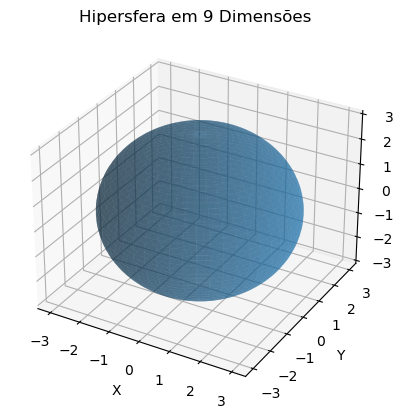

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_hypersphere(D):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Criar uma malha esférica
    phi, theta = np.mgrid[0.0:np.pi:100j, 0.0:2.0*np.pi:100j]
    x = np.sin(phi) * np.cos(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(phi)

    # Ajustar raio da hiperesfera para 1
    x *= np.sqrt(D)
    y *= np.sqrt(D)
    z *= np.sqrt(D)

    ax.plot_surface(x, y, z, alpha=0.5)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Hipersfera em {D} Dimensões')

    plt.show()

# Definir a dimensão D
D = 9  # Altere para a dimensão desejada

# Plotar a hiperesfera
plot_hypersphere(D)


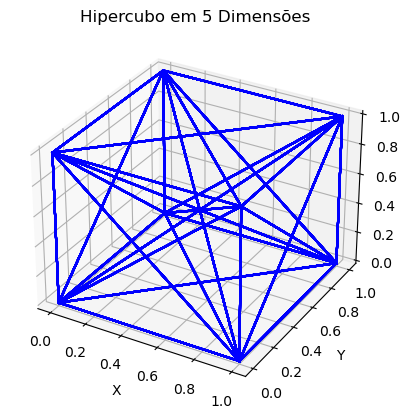

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product, combinations

def draw_hypercube(D):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Criar vértices para o hipercubo
    vertices = np.array(list(product([0, 1], repeat=D)))

    # Conectar os vértices para formar as arestas
    edges = list(combinations(vertices, 2))

    # Plotar as arestas do hipercubo
    for edge in edges:
        ax.plot3D(*zip(*edge), color="b")

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Hipercubo em {D} Dimensões')

    plt.show()

# Definir a dimensão D
D = 5  # Altere para a dimensão desejada

# Desenhar o hipercubo
draw_hypercube(D)
